In [1]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

In [2]:
data = pd.read_csv("../../data/processed/expensas_full.csv",
                  dtype = {
                                "expensa_id": "object",
                                "unidad_id": "object",
                                "propietario_id": "object",
                                "inquilino_id": "object",
                                "consorcio_id": "object",
                                "consorcio_usa_fondo": "bool",
                                "consorcio_solo_muestra_cat": "bool",
                                "unidad_tipo":"object",
                                "expensa_concepto": "object",
                                "expensa_mes":"object",
                                "expensa_anio":"object",
                                "unidad_propietario":"object",
                                "unidad_inquilino":"object",
                                "expensa_version":"object"
                            },
                  parse_dates = ["consorcio_fecha_creacion", "expensa_primer_vencimiento", "expensa_segundo_vencimiento"])
data.pago_fecha = pd.to_datetime(data.pago_fecha, errors="coerce")
data.expensa_mes = data.expensa_mes.str.pad(width=2, side = "left", fillchar= "0")
data["expensa_fecha"] = pd.to_datetime(data.expensa_anio + "-" + data.expensa_mes + "-01")
data["expensa_mes_pago"] = pd.to_datetime(data.expensa_primer_vencimiento.dt.year.map(str) + '-'+ data.expensa_primer_vencimiento.dt.month.map(str) + '-01')
data.loc[data.pago_fecha.isna() | (data.pago_fecha >= (data.expensa_mes_pago + pd.DateOffset(months=1))), "target"] = 1
data.loc[data.target.isna(), "target"] = 0
data[["expensa_mes","expensa_anio", "expensa_mes_pago", "expensa_primer_vencimiento", "expensa_segundo_vencimiento", "pago_fecha", "pago_monto", "target"]]

,expensa_mes,expensa_anio,expensa_mes_pago,expensa_primer_vencimiento,expensa_segundo_vencimiento,pago_fecha,pago_monto,target
0,01,2014,2014-02-01,2014-02-10,2014-02-20,NaT,NaN,1.0
1,02,2014,2014-03-01,2014-03-10,2014-03-20,NaT,NaN,1.0
2,03,2014,2014-04-01,2014-04-10,2014-04-20,2014-04-08,624.45,0.0
3,04,2014,2014-05-01,2014-05-10,2014-05-20,2014-05-05,857.58,0.0
4,05,2014,2014-06-01,2014-06-10,2014-06-20,2014-06-04,710.80,0.0
5,06,2014,2014-07-01,2014-07-10,2014-07-20,2014-07-07,1109.25,0.0
6,07,2014,2014-08-01,2014-08-10,2014-08-20,2014-10-01,931.22,1.0
7,08,2014,2014-09-01,2014-09-10,2014-09-20,2014-09-09,879.12,0.0
8,09,2014,2014-10-01,2014-10-10,2014-10-20,2014-10-07,1538.82,0.0
9,10,2014,2014-11-01,2014-11-10,2014-11-20,2014-11-04,72.26,0.0


In [3]:
df = data[['consorcio_id', 'consorcio_nombre', 'unidad_id',
       'unidad_denominacion','unidad_tipo','expensa_id',
       'expensa_proporcion', 'expensa_mes', 'expensa_fecha', 'expensa_mes_pago', 
       'expensa_version', 'expensa_concepto', 'pago_fecha', 'pago_metodo','target']]

In [4]:
df["expensa_mes_pago_anterior"] = df.expensa_mes_pago - pd.DateOffset(months=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
df.loc[df.pago_metodo.isin(["Efectivo","Cheque"]),"pago_metodo"] = "Efec-Cheque"
df.loc[df.pago_metodo.isin(["Rapipago", "Pago Facil"]),"pago_metodo"] = "EntePago"
df.loc[df.pago_metodo.isin(["Transferencia", "Pago Mis Cuentas","Link Pagos","Bapropagos","Débito directo", "Débito Santander"]),"pago_metodo"] = "Internet"
df.loc[df.pago_metodo.isin(["Nota de crédito", "Saldo a favor unidad"]),"pago_metodo"] = "Otro"
df.loc[df.pago_metodo.isna() | df.target.map(bool),"pago_metodo"] = "Impago"

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
resumen_consorcios = pd.read_csv("../../data/processed/resumen_consorcios.csv",
                                dtype = {
                                   "consorcio_id":"object"
                               },
                               parse_dates = ["expensa_mes_pago"])
resumen_consorcios.columns = ['consorcio_id', 'consorcio_expensa_mes_pago', 'impagos', 'cantidad_expensas',
       'cantidad_efectivo', 'prop_impagos', 'prop_efectivo']

In [7]:
resumen_unidades = pd.read_csv("../../data/processed/resumen_unidades.csv", 
                               dtype = {
                                   "unidad_id":"object"
                               },
                               parse_dates = ["expensa_mes_pago"])
resumen_unidades.columns = ['unidad_id', 'unidad_expensa_mes_pago', 'prop_impagos']

In [8]:
df = pd.merge(df,
            resumen_consorcios,
            left_on=["expensa_mes_pago_anterior","consorcio_id"],
            right_on=["consorcio_expensa_mes_pago", "consorcio_id"],
            how = "left",
            suffixes = ("", "_consorcio"))

In [9]:
df = pd.merge(df,
            resumen_unidades,
            left_on=["expensa_mes_pago_anterior","unidad_id"],
            right_on=["unidad_expensa_mes_pago", "unidad_id"],
            how = "left",
            suffixes = ("", "_unidad"))

In [10]:
df.columns

Index(['consorcio_id', 'consorcio_nombre', 'unidad_id', 'unidad_denominacion',
       'unidad_tipo', 'expensa_id', 'expensa_proporcion', 'expensa_mes',
       'expensa_fecha', 'expensa_mes_pago', 'expensa_version',
       'expensa_concepto', 'pago_fecha', 'pago_metodo', 'target',
       'expensa_mes_pago_anterior', 'consorcio_expensa_mes_pago', 'impagos',
       'cantidad_expensas', 'cantidad_efectivo', 'prop_impagos',
       'prop_efectivo', 'unidad_expensa_mes_pago', 'prop_impagos_unidad'],
      dtype='object')

In [50]:
pagos_anteriores = df[["unidad_id","expensa_mes_pago","expensa_mes_pago_anterior","pago_metodo"]]
pagos_anteriores = pagos_anteriores.set_index(["unidad_id","expensa_mes_pago"])

In [51]:
model_df = df

model_df = pd.merge(model_df,
         pagos_anteriores,
         left_on = ["unidad_id","expensa_mes_pago_anterior"],
         right_index = True,
         suffixes = ("", "_lag_1"))

In [52]:
for i in range(2,7):
    model_df = pd.merge(model_df,
         pagos_anteriores,
         left_on = ["unidad_id","expensa_mes_pago_anterior_lag_{}".format(i-1)],
         right_index = True,
         suffixes = ("", "_lag_"+str(i)))

In [53]:
model_df.columns

Index(['consorcio_id', 'consorcio_nombre', 'unidad_id', 'unidad_denominacion',
       'unidad_tipo', 'expensa_id', 'expensa_proporcion', 'expensa_mes',
       'expensa_fecha', 'expensa_mes_pago', 'expensa_version',
       'expensa_concepto', 'pago_fecha', 'pago_metodo', 'target',
       'expensa_mes_pago_anterior', 'consorcio_expensa_mes_pago', 'impagos',
       'cantidad_expensas', 'cantidad_efectivo', 'prop_impagos',
       'prop_efectivo', 'unidad_expensa_mes_pago', 'prop_impagos_unidad',
       'expensa_mes_pago_anterior_lag_1', 'pago_metodo_lag_1',
       'expensa_mes_pago_anterior_lag_2', 'pago_metodo_lag_2',
       'expensa_mes_pago_anterior_lag_3', 'pago_metodo_lag_3',
       'expensa_mes_pago_anterior_lag_4', 'pago_metodo_lag_4',
       'expensa_mes_pago_anterior_lag_5', 'pago_metodo_lag_5',
       'expensa_mes_pago_anterior_lag_6', 'pago_metodo_lag_6'],
      dtype='object')

In [31]:
model_df = model_df.sort_values("expensa_mes_pago")

In [54]:
X_columns  = ['unidad_tipo', 'expensa_proporcion', 'expensa_mes', 'cantidad_expensas', 'prop_impagos',
              'prop_efectivo', 'prop_impagos_unidad',
                'pago_metodo_lag_1',
                'pago_metodo_lag_2',
                'pago_metodo_lag_3',
                'pago_metodo_lag_4',
                'pago_metodo_lag_5',
                'pago_metodo_lag_6']

idxs = range(0, len(model_df))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test, idx_train, idx_test = train_test_split(model_df[X_columns], model_df.target, idxs, shuffle = False, test_size = 0.2)

In [124]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [125]:
print("train", X_train.shape, Y_train.shape)
print("test", X_test.shape, Y_test.shape)

train (130076, 55) (130076,)
test (32519, 55) (32519,)


In [106]:
delete_columns = [column for column in X_test.columns if column not in X_train.columns]
X_test = X_test.drop(columns = delete_columns)

In [107]:
delete_columns

[]

In [108]:
for column in  [column for column in X_train.columns if column not in X_test.columns]:
    X_test[column] = 0
    print(column)

In [126]:
X_train.expensa_proporcion = X_train.expensa_proporcion/100
X_test.expensa_proporcion = X_test.expensa_proporcion/100

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[["cantidad_expensas"]])
X_train.cantidad_expensas = scaler.transform(X_train[["cantidad_expensas"]])
X_test.cantidad_expensas = scaler.transform(X_test[["cantidad_expensas"]])

In [123]:
X_test = model_df.sort_values("expensa_mes_pago").reset_index().loc[idx_test3, X_columns]
X_train = model_df.sort_values("expensa_mes_pago").reset_index().loc[idx_train3 + list(range(0, min_test_id)), X_columns]
Y_test = model_df.sort_values("expensa_mes_pago").reset_index().loc[idx_test3, "target"]
Y_train = model_df.sort_values("expensa_mes_pago").reset_index().loc[idx_train3 + list(range(0, min_test_id)), "target"]

In [128]:
X_train.shape

(130076, 55)

## Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegressionCV

id_train, id_cv = train_test_split(idx_train, shuffle = False, test_size = 0.2)

linear_modelCV = LogisticRegressionCV(
    cv = [(id_train3, id_cv3)],
    scoring = "f1",
    n_jobs = -1,
    verbose = 5,
    refit = True,
)

In [136]:
linear_modelCV.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


IndexError: index 156438 is out of bounds for axis 0 with size 130076

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_preds = linear_modelCV.predict(X_train)
print("accuracy:", accuracy_score(Y_train, train_preds))
print("precision:", precision_score(Y_train, train_preds))
print("recall:", recall_score(Y_train, train_preds))
print("f1:", f1_score(Y_train, train_preds))

accuracy: 0.8819536271103048
precision: 0.8128769128873706
recall: 0.700144118176905
f1: 0.7523107447615053


In [134]:
test_preds = linear_modelCV.predict(X_test)
print("accuracy:", accuracy_score(Y_test, test_preds))
print("precision:", precision_score(Y_test, test_preds))
print("recall:", recall_score(Y_test, test_preds))
print("f1:", f1_score(Y_test, test_preds))

accuracy: 0.8805006304006888
precision: 0.7832472562943835
recall: 0.6561654948620876
f1: 0.7140965273690406


## Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(
    n_estimators = 1000,
    min_samples_split = 20,
    max_depth = 10
)
randomforest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
train_preds = randomforest.predict(X_train)
print("accuracy:", accuracy_score(Y_train, train_preds))
print("precision:", precision_score(Y_train, train_preds))
print("recall:", recall_score(Y_train, train_preds))
print("f1:", f1_score(Y_train, train_preds))
print("---------------------------------------------")
test_preds = randomforest.predict(X_test)
print("accuracy:", accuracy_score(Y_test, test_preds))
print("precision:", precision_score(Y_test, test_preds))
print("recall:", recall_score(Y_test, test_preds))
print("f1:", f1_score(Y_test, test_preds))

accuracy: 0.8915249546419016
precision: 0.8488405902449662
recall: 0.7012250045036931
f1: 0.7680039460703716
---------------------------------------------
accuracy: 0.8854515821519727
precision: 0.8161929371231696
recall: 0.6406165494862087
f1: 0.7178244072418756


### Analisis de Coeficientes
#### Log Regresion

In [56]:
lm_coef = pd.DataFrame({
    "variable": X_train.columns,
    "coef": linear_modelCV.coef_[0]
})

In [57]:
lm_coef["abs_coef"] = abs(lm_coef.coef)

In [58]:
from pandas.api.types import CategoricalDtype
lm_coef = lm_coef.sort_values("abs_coef", ascending = False)
lm_coef = lm_coef.reset_index().drop(columns="index")

variable_cat = CategoricalDtype(categories=lm_coef.variable, ordered=True)
lm_coef.variable = lm_coef.variable.astype(variable_cat)

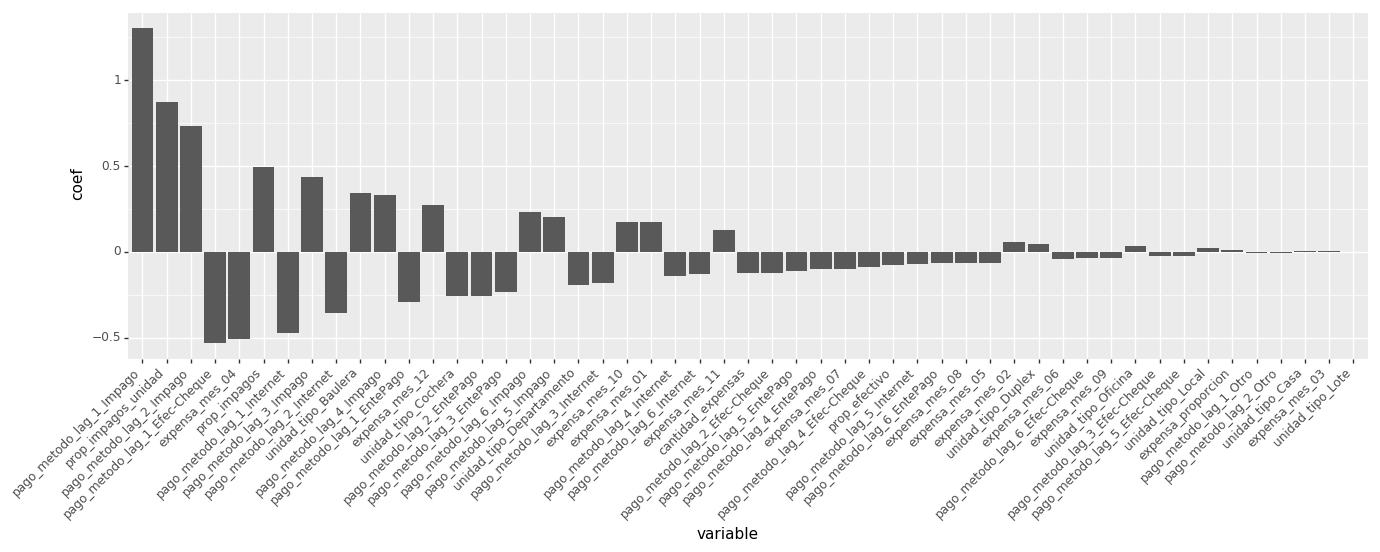

<ggplot: (130332955207)>

In [59]:
figure_size = (16, 4.8)
(ggplot(data=lm_coef)
+ geom_bar(aes(x = "variable",y="coef"), stat = "identity")
+ theme( axis_text_x = element_text(angle = 45, hjust = 1),
          figure_size = (16, 4.5))
)

#### Random Forest

In [139]:
rf_importances = pd.DataFrame({
    "variable": X_train.columns,
    "importance": randomforest.feature_importances_
})

In [140]:
from pandas.api.types import CategoricalDtype
rf_importances = rf_importances.sort_values("importance", ascending = False)
rf_importances = rf_importances.reset_index().drop(columns="index")

variable_cat = CategoricalDtype(categories=rf_importances.variable, ordered=True)
rf_importances.variable = rf_importances.variable.astype(variable_cat)

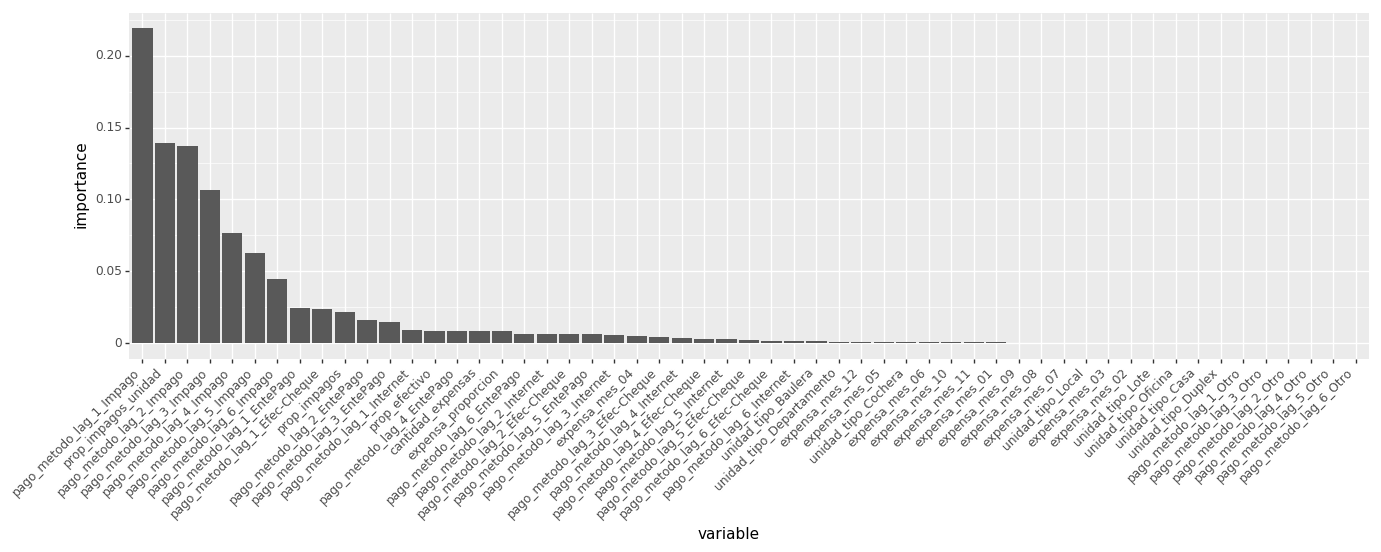

<ggplot: (-9223371860951194578)>

In [141]:
figure_size = (16, 4.8)
(ggplot(data=rf_importances)
+ geom_bar(aes(x = "variable",y="importance"), stat = "identity")
 + theme( axis_text_x = element_text(angle = 45, hjust = 1),
          figure_size = (16, 4.5))
)

## Sample Splitting

In [67]:
sample_df = model_df[["expensa_mes_pago"]]
sample_df = sample_df.sort_values("expensa_mes_pago").reset_index()
sample_df.loc[:max(id_train), "group"] = "train"
sample_df.loc[min(id_cv):max(id_cv), "group"] = "cv"
sample_df.loc[min(idx_test):, "group"] = "test"

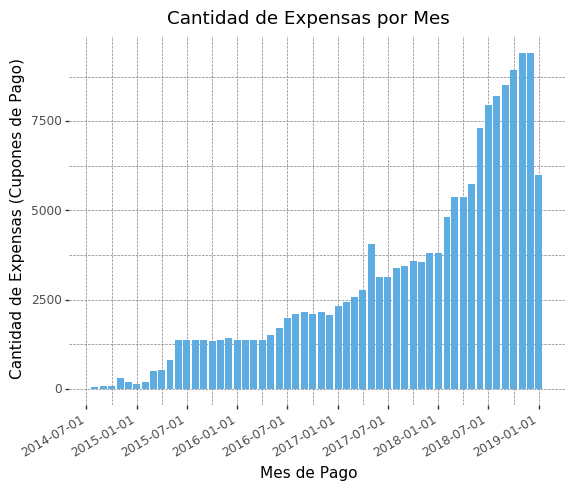

<ggplot: (-9223371860953451169)>

In [68]:
(ggplot(data=sample_df)
 + geom_bar(aes(x="expensa_mes_pago"), fill="#5DADE2")
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5),
     axis_text_x = element_text(angle = 30, hjust = 1)
 )
 + ylab("Cantidad de Expensas (Cupones de Pago)")
 + ggtitle("Cantidad de Expensas por Mes")
 + xlab("Mes de Pago")
)

C:\Anaconda3\lib\site-packages\plotnine\positions\position.py:192: UserWarning: position_stack requires non-overlapping x intervals
  warn(msg.format(cls.__name__))


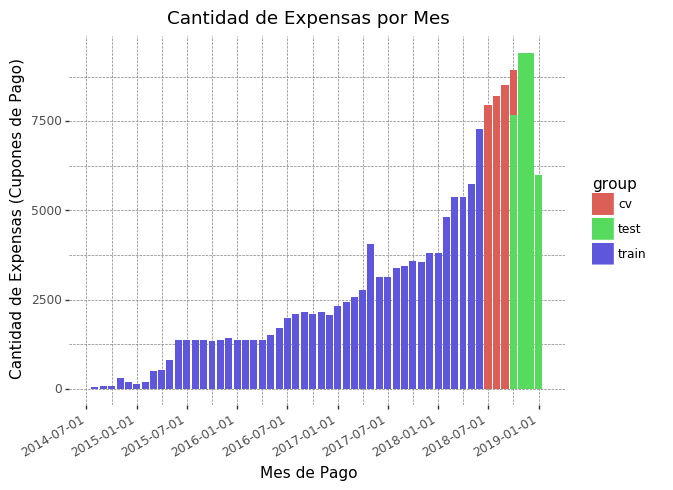

<ggplot: (175902040794)>

In [69]:
(ggplot(data=sample_df)
 + geom_bar(aes(x="expensa_mes_pago", fill="group"))
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5),
     axis_text_x = element_text(angle = 30, hjust = 1)
 )
 + ylab("Cantidad de Expensas (Cupones de Pago)")
 + ggtitle("Cantidad de Expensas por Mes")
 + xlab("Mes de Pago")
)

In [70]:
idx_train2, idx_test2 = train_test_split(idxs, shuffle = True, test_size = 0.2)
id_train2, id_cv2 = train_test_split(idx_train2, shuffle = True, test_size = 0.2)

In [71]:
sample_df["group2"] = "0"
sample_df.iloc[id_train2, 3] = "train"
sample_df.iloc[id_cv2, 3] = "cv"
sample_df.iloc[idx_test2,3] = "test"

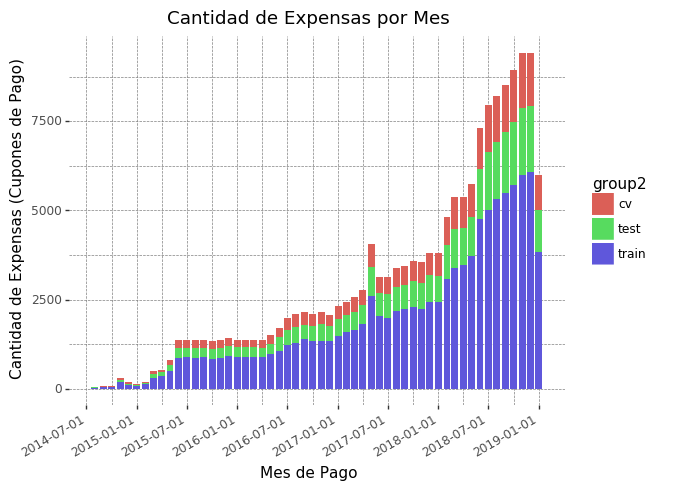

<ggplot: (175901592093)>

In [72]:
(ggplot(data=sample_df)
 + geom_bar(aes(x="expensa_mes_pago", fill="group2"))
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5),
     axis_text_x = element_text(angle = 30, hjust = 1)
 )
 + ylab("Cantidad de Expensas (Cupones de Pago)")
 + ggtitle("Cantidad de Expensas por Mes")
 + xlab("Mes de Pago")
)

In [73]:
min_test_id = (model_df.expensa_mes_pago < "2018-01-01").sum()

In [74]:
idxs3 = range(min_test_id, len(model_df))

In [75]:
idx_train3, idx_test3 = train_test_split(idxs3, shuffle = True, test_size =len(idx_test))
id_train3, id_cv3 = train_test_split(idx_train3, shuffle = True, test_size =len(id_cv))
id_train3 += range(0, min_test_id)

In [76]:
sample_df["group3"] = "0"
sample_df.iloc[id_train3, 4] = "train"
sample_df.iloc[id_cv3, 4] = "cv"
sample_df.iloc[idx_test3,4] = "test"

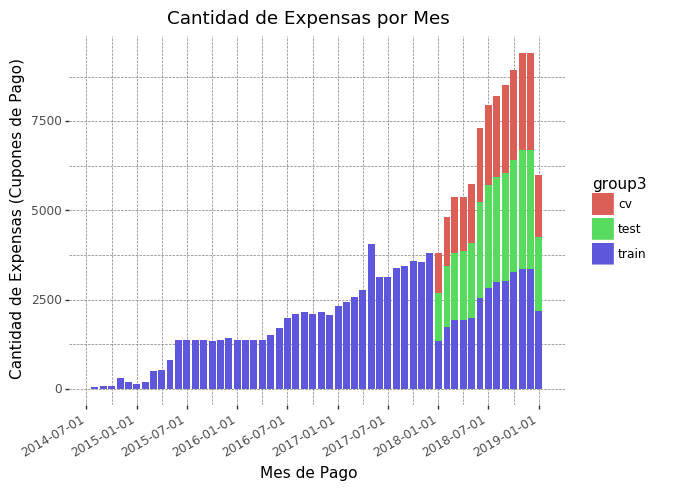

<ggplot: (175901327820)>

In [77]:
(ggplot(data=sample_df)
 + geom_bar(aes(x="expensa_mes_pago", fill="group3"))
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5),
     axis_text_x = element_text(angle = 30, hjust = 1)
 )
 + ylab("Cantidad de Expensas (Cupones de Pago)")
 + ggtitle("Cantidad de Expensas por Mes")
 + xlab("Mes de Pago")
)

In [78]:
sample_df.groupby("group3").count()

,index,expensa_mes_pago,group,group2
group3,,,,
cv,26016,26016,26016,26016
test,32519,32519,32519,32519
train,104060,104060,104060,104060


## Grid Search RF

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 100, 500, 1000],
    "criterion":["gini", "entropy"],
    "max_depth": [3,4,5,6,10, None],
    "min_samples_split": [2, 10, 20]
}

rf = GridSearchCV( 
    estimator= RandomForestClassifier(),
    param_grid = param_grid,
    scoring = "f1",
    n_jobs = -1,
    cv = [(id_train, id_cv)],
    return_train_score = True,
    refit = True,
    verbose = 10
)


In [41]:
max(idx_train)

130075

In [42]:
rf.fit(X_train.values, Y_train.values)

Fitting 1 folds for each of 144 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 44.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 44.6min finished


GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...3, 130064, 130065, 130066, 130067, 130068, 130069, 130070, 130071, 130072, 130073, 130074, 130075])],
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 500,

In [44]:
from sklearn.metrics import *
train_preds = rf.predict(X_train)
print("accuracy:", accuracy_score(Y_train, train_preds))
print("precision:", precision_score(Y_train, train_preds))
print("recall:", recall_score(Y_train, train_preds))
print("-----------------------------------")
test_preds = rf.predict(X_test)
print("accuracy:", accuracy_score(Y_test, test_preds))
print("precision:", precision_score(Y_test, test_preds))
print("recall:", recall_score(Y_test, test_preds))

accuracy: 0.8947307727789907
precision: 0.859723191012886
recall: 0.7034544908380895
-----------------------------------
accuracy: 0.8717057720102094
precision: 0.7586206896551724
recall: 0.6411225040474906


In [45]:
rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 20,
 'n_estimators': 1000}

In [46]:
rf.best_score_

0.7171806167400882

In [47]:
rf.cv_results_

{'mean_fit_time': array([  1.02326298,  16.70734429,  89.21158767, 185.04599404,
          1.77026749,  18.78977776,  95.28435802, 191.29029894,
          1.86701179,  19.17474174,  91.04867864, 184.5393436 ,
          2.78156233,  24.29206967, 117.73434758, 238.4921298 ,
          2.42052937,  23.33662391, 113.35656738, 240.91561103,
          3.26030111,  24.25473285, 119.57937407, 225.37159634,
          2.9700582 ,  26.03840089, 141.32026529, 269.80387068,
          3.29020572,  30.01676846, 138.39508271, 262.22214079,
          3.03887486,  27.47954869, 141.83293033, 270.9892149 ,
          3.60436487,  36.11051822, 161.57814813, 292.0823369 ,
          3.62729812,  34.13476181, 142.56792116, 304.98385572,
          3.9354825 ,  31.41503119, 155.6260736 , 286.48530054,
          4.49099755,  41.43775296, 215.14797664, 391.15452671,
          4.59073019,  45.18376589, 202.96249413, 370.16257668,
          4.54285717,  42.46648765, 191.3744719 , 389.01203322,
          7.22767854,  

In [54]:
import pickle
with open("../../models/random_forests.pkl","wb") as file:
    pickle.dump(rf.best_estimator_, file)

In [62]:
model_df_test = model_df.iloc[-len(X_test):,:]

In [63]:
model_df_test.shape

(32519, 42)

In [65]:
model_df_test["predicted"] = test_preds

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
model_df_test_c = model_df_test[["consorcio_id", "consorcio_nombre", "target", "predicted"]]

In [67]:
model_df_test_c["TP"] = model_df_test_c.target.map(bool) & model_df_test_c.predicted.map(bool)
model_df_test_c["TN"] = ~model_df_test_c.target.map(bool) & ~model_df_test_c.predicted.map(bool)
model_df_test_c["FP"] = ~model_df_test_c.target.map(bool) & model_df_test_c.predicted.map(bool)
model_df_test_c["FN"] = model_df_test_c.target.map(bool) & ~model_df_test_c.predicted.map(bool)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [68]:
results_by_consorcio = model_df_test_c.groupby(["consorcio_id","consorcio_nombre"]).sum()

In [69]:
results_by_consorcio["Total"] = results_by_consorcio.TP + results_by_consorcio.TN + results_by_consorcio.FP + results_by_consorcio.FN
results_by_consorcio["PP"] = results_by_consorcio.TP + results_by_consorcio.FP
results_by_consorcio["PN"] = results_by_consorcio.TN + results_by_consorcio.FN
results_by_consorcio["RP"] = results_by_consorcio.TP + results_by_consorcio.FN
results_by_consorcio["RN"] = results_by_consorcio.FP + results_by_consorcio.TN

In [70]:
results_by_consorcio["accuracy"] = (results_by_consorcio.TP + results_by_consorcio.TN)/results_by_consorcio.Total
results_by_consorcio["precision"] = (results_by_consorcio.TP)/results_by_consorcio.PP
results_by_consorcio["recall"] = results_by_consorcio.TP / results_by_consorcio.RP

In [73]:
results_by_consorcio[["TP","TN","FP","FN", "Total","accuracy", "precision", "recall"]].sort_values("accuracy", ascending = True)

,,TP,TN,FP,FN,Total,accuracy,precision,recall
consorcio_id,consorcio_nombre,,,,,,,,
1530,EDIFICIO SAFIRA III,7.0,11.0,15.0,9.0,42.0,0.428571,0.318182,0.437500
1490,"CONSORCIO MONOBLOCK A""""",33.0,35.0,47.0,33.0,148.0,0.459459,0.412500,0.500000
1445,EL NOGAL,9.0,7.0,4.0,8.0,28.0,0.571429,0.692308,0.529412
1526,Santa Rosa 685,2.0,21.0,0.0,17.0,40.0,0.575000,1.000000,0.105263
1729,Consorcio Costa Rica 6025/27,9.0,22.0,9.0,9.0,49.0,0.632653,0.500000,0.500000
1736,Edificio Runa IV,1.0,19.0,2.0,8.0,30.0,0.666667,0.333333,0.111111
1683,Italia 1123,13.0,70.0,15.0,26.0,124.0,0.669355,0.464286,0.333333
1700,MAIPÚ Nº 181,59.0,42.0,30.0,12.0,143.0,0.706294,0.662921,0.830986
1685,3 de Febrero 2682,20.0,60.0,24.0,8.0,112.0,0.714286,0.454545,0.714286


In [75]:
feat_impo = pd.DataFrame({
    "feature":X_train.columns,
    "importance":rf.best_estimator_.feature_importances_
})

In [76]:
feat_impo.sort_values("importance", ascending=False)

,feature,importance
7,target_lag_1,0.193242
8,target_lag_2,0.143967
6,prop_impagos_unidad,0.133621
9,target_lag_3,0.094725
10,target_lag_4,0.067760
11,target_lag_5,0.060405
12,target_lag_6,0.038437
35,pago_metodo_lag_1_Impago,0.036199
40,pago_metodo_lag_2_Impago,0.032327
45,pago_metodo_lag_3_Impago,0.024096


In [77]:
X_train

,expensa_proporcion,impagos,cantidad_expensas,cantidad_efectivo,prop_impagos,prop_efectivo,prop_impagos_unidad,target_lag_1,target_lag_2,target_lag_3,...,pago_metodo_lag_5_Efec-Cheque,pago_metodo_lag_5_EntePago,pago_metodo_lag_5_Impago,pago_metodo_lag_5_Internet,pago_metodo_lag_5_Otro,pago_metodo_lag_6_Efec-Cheque,pago_metodo_lag_6_EntePago,pago_metodo_lag_6_Impago,pago_metodo_lag_6_Internet,pago_metodo_lag_6_Otro
6,3.005344,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2166,0.513829,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2226,1.998189,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2286,2.560982,13.0,42.0,0.0,0.309524,0.000000,1.000000,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0
1446,3.434263,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
66,1.946608,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1386,0.995673,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1326,3.196069,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1266,3.191261,13.0,42.0,0.0,0.309524,0.000000,0.500000,1.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
126,3.569059,13.0,42.0,0.0,0.309524,0.000000,0.333333,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
